<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/physionet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne

     |████████████████████████████████| 7.4 MB 33.8 MB/s 


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import mne
from mne import create_info
from mne.io import RawArray
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import glob

In [3]:
from mne.datasets import eegbci
eegbci.load_data(1,[3, 4, 7, 8, 11,12],path='/content/datasets/',base_url='https://physionet.org/files/eegmmidb/1.0.0/') 

Do you want to set the path:
    /content/datasets
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json


['/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf',
 '/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf',
 '/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf',
 '/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R08.edf',
 '/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf',
 '/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R12.edf']

In [4]:
edf_files = glob.glob("/content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/*.edf")


In [5]:
raws = [read_raw_edf(f, preload=True) for f in edf_files]

Extracting EDF parameters from /content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /content/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5

In [6]:
names = ['Fc5', 'Fc3', 'Fc1', 'Fcz', 
            'Fc2', 'Fc4', 'Fc6', 'C5', 
            'C3', 'C1', 'Cz', 'C2', 
            'C4', 'C6', 'Cp5', 'Cp3', 
            'Cp1', 'Cpz', 'Cp2',
            'Cp4', 'Cp6', 'Fp1', 'Fpz', 
            'Fp2', 'Af7', 'Af3', 'Afz', 
            'Af4', 'Af8', 'F7', 'F5', 
            'F3', 'F1', 'Fz', 'F2', 
            'F4', 'F6',
         'F8', 'Ft7', 'Ft8', 'T7', 
            'T8', 'T9', 'T10',
         'Tp7', 'Tp8', 'P7', 'P5', 
            'P3', 'P1', 'Pz',
         'P2', 'P4', 'P6', 'P8', 
            'Po7', 'Po3', 'Poz',
         'Po4', 'Po8', 'O1', 'Oz', 
            'O2', 'Iz']

In [7]:
raw_obj = concatenate_raws(raws)

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


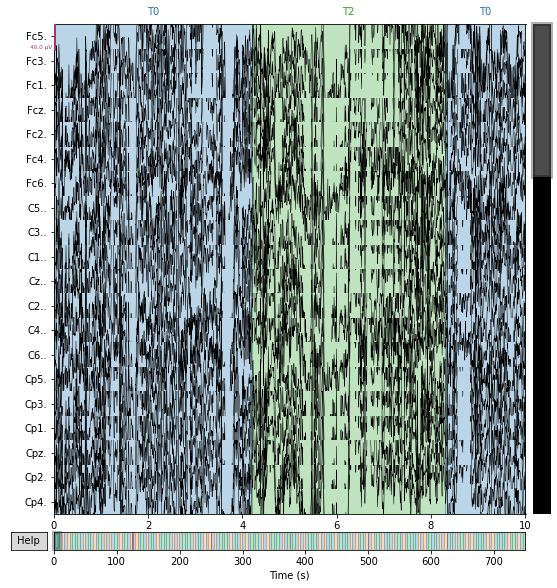

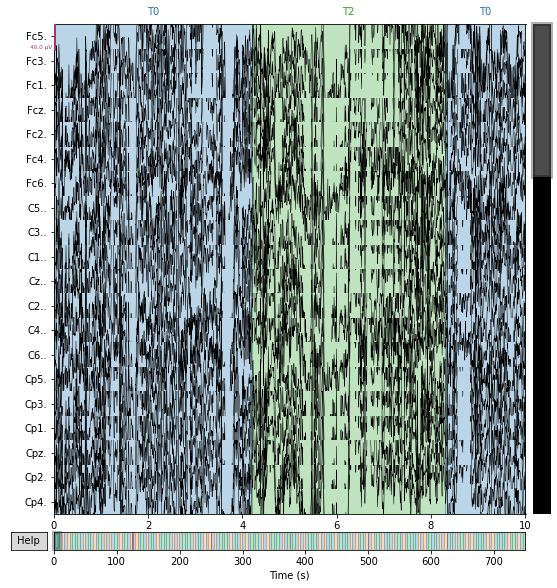

In [8]:
raw_obj.plot()

Effective window size : 12.800 (s)


<ipython-input-9-6d848ec344b6>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_obj.plot_psd()


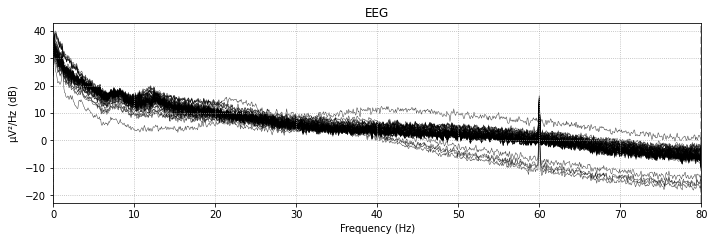

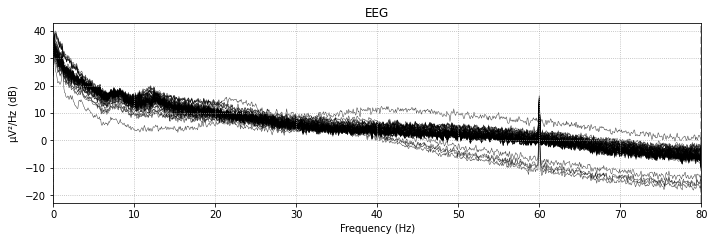

In [9]:
raw_obj.plot_psd()

In [10]:
raw_obj.notch_filter([60], filter_length='auto', phase='zero') 

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 sec)



<RawEDF | S001R04.edf, 64 x 120000 (750.0 s), ~58.7 MB, data loaded>

Effective window size : 12.800 (s)


<ipython-input-11-6d848ec344b6>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_obj.plot_psd()


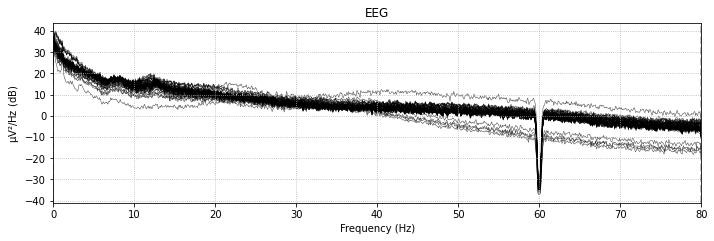

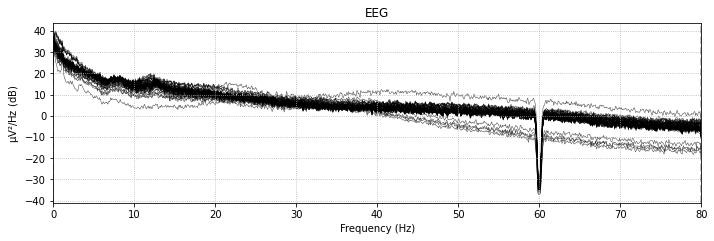

In [11]:
raw_obj.plot_psd()

In [12]:
event=mne.events_from_annotations(raw_obj)


Used Annotations descriptions: ['T0', 'T1', 'T2']


In [13]:
df=pd.DataFrame(raw_obj[:][0].T,columns=names)

In [14]:
data=df[['C1','C2']]
np_data=data.to_numpy()
np_event=np.array(event)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
size_np=np_event[0].shape[0]
X = np.zeros((size_np, 1, 640, 2), dtype='float32')
y= np.zeros(np_event[0].shape[0], dtype='float32')

In [30]:
for n in range(np_event[0].shape[0]): 
    start=event[0][n][0]
    end=start+640
    X[n, 0] = np_data[start:end,:]
    y[n, ]= np_event[0][n][2]

In [37]:
boolArr=y >1

In [38]:
y=y[boolArr]
X=X[boolArr]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape

(60, 1, 640, 2)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.nn import MaxPool1d
class CNN_Model_v1(nn.Module):
    def __init__(self):
        super(CNN_Model_v1, self).__init__()
        # Layer 1
        self.conv1 = nn.Conv1d(in_channels=1,out_channels=25,kernel_size= (11, 1, 1, 25))
        self.conv2 = nn.Conv1d(in_channels=25,out_channels=25,kernel_size= (1, 2, 25, 25))
        self.maxpool1 = MaxPool1d(kernel_size=(1,3,1,1), stride=(1,3,1,1))
        self.conv3 = nn.Conv1d(in_channels=25,out_channels=50,kernel_size= (11, 1, 25, 50))
        self.maxpool2 = MaxPool1d(kernel_size=(1,3,1,1), stride=(1,3,1,1))
        self.conv4 = nn.Conv1d(in_channels=50,out_channels=100,kernel_size= (11, 1, 50, 100))
        self.maxpool3 = MaxPool1d(kernel_size=(1,3,1,1), stride=(1,3,1,1))
        self.conv5 = nn.Conv1d(in_channels=100,out_channels=200,kernel_size= (11, 1, 100, 200))
        self.maxpool4 = MaxPool1d(kernel_size=(1,2,1,1), stride=(1,2,1,1))
        self.fc1 = nn.Linear(800, 1)




    def forward(self, x):
        # Layer 1
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        x = self.maxpool2(x)
        x = self.conv4(x)
        x = self.maxpool3(x)
        x = self.conv5(x)
        x = self.maxpool4(x)
        x = nn.sigmoid(self.fc1(x))
        return x


net = CNN_Model_v1()
#print(net.forward(Variable(torch.Tensor(np.random.rand(1, 1, 120, 64)).cuda(0))))
# The model
net = CNN_Model()

#if cuda.is_available():
 #   net = net.cuda()

# Our loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9) 

In [ ]:
net

CNN_Model_v1(
  (conv1): Conv1d(1, 25, kernel_size=(11, 1, 1, 25), stride=(1,))
  (conv2): Conv1d(25, 25, kernel_size=(1, 2, 25, 25), stride=(1,))
  (maxpool1): MaxPool1d(kernel_size=(1, 3, 1, 1), stride=(1, 3, 1, 1), padding=0, dilation=1, ceil_mode=False)
)

In [41]:

# save numpy array as npy file
from numpy import asarray
from numpy import save
np.save('dataX.npy', X)

In [42]:
np.save('datay.npy', y)

In [33]:
from numpy import load
data = load('datay.npy')

In [34]:
data.shape

(90,)